In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

pd.set_option('display.max_columns', 50)

### Read data files

In [2]:
master_data_folder_path = "../../data/csv"
community_areas = pd.read_csv(os.path.join(master_data_folder_path, "community_areas_master.csv"))
company = pd.read_csv(os.path.join(master_data_folder_path, "company_master.csv"))
date = pd.read_csv(os.path.join(master_data_folder_path, "date_dimensions.csv"))
payment_type = pd.read_csv(os.path.join(master_data_folder_path, "payment_type_master.csv"))

In [3]:
trips_list = []
weather_list = []

In [4]:
taxi_data_dir = "../../data/visualization_sample_data/taxi/"
for file in os.listdir(taxi_data_dir):
    df = pd.read_csv(os.path.join(taxi_data_dir, file))
    trips_list.append(df)

In [5]:
trips = pd.concat(trips_list, ignore_index=True)

In [6]:
weather_data_dir = "../../data/visualization_sample_data/weather/"
for file in os.listdir(weather_data_dir):
    df = pd.read_csv(os.path.join(weather_data_dir, file))
    weather_list.append(df)

In [7]:
weather = pd.concat(weather_list, ignore_index=True)

### Join data together

In [8]:
trips_full = pd.merge(trips, weather, how='inner', left_on='datetime_for_weather', right_on='datetime')
trips_full = trips_full.drop(columns=['datetime'])

In [9]:
trips_full = pd.merge(trips_full, company, how='inner', left_on='company_id', right_on='company_id')
trips_full = trips_full.drop(columns=['company_id'])

In [10]:
trips_full = pd.merge(trips_full, payment_type, how='inner', left_on='payment_type_id', right_on='payment_type_id')
trips_full = trips_full.drop(columns=['payment_type_id'])

In [11]:
trips_full = pd.merge(trips_full, community_areas, how='inner', left_on='pickup_community_area_id', right_on='area_codes')
trips_full = trips_full.drop(columns=['pickup_community_area_id', 'area_codes'])
trips_full.rename(columns={'community_name': 'pickup_community_area_name'}, inplace=True)

In [12]:
trips_full = pd.merge(trips_full, community_areas, how='inner', left_on='dropoff_community_area_id', right_on='area_codes')
trips_full = trips_full.drop(columns=['dropoff_community_area_id', 'area_codes'])
trips_full.rename(columns={'community_name': 'dropoff_community_area_name'}, inplace=True)

In [13]:
date['date'] = pd.to_datetime(date['date'])
trips_full['trip_start_timestamp'] = pd.to_datetime(trips_full['trip_start_timestamp'])
trips_full['trip_start_date'] = trips_full['trip_start_timestamp'].dt.date
trips_full['trip_start_date'] = pd.to_datetime(trips_full['trip_start_date'])

In [14]:
trips_full = pd.merge(trips_full, date, how='inner', left_on='trip_start_date', right_on='date')
trips_full = trips_full.drop(columns=['date'])

In [15]:
trips_full.head()

trip_id  \
0  5ee20338b274b65f85199a01933f31cb3169e62d   
1  5d8f5da99c7cf5d8f2b6edffe12264723762f84d   
2  599f0e4c4cf2e7771f48aec8e9263ee21abe59f9   
3  55e92b1dbd55f5de2b191cef8db390b7dbf76b52   
4  5036fb04a93f0c2e2942eeab3e85d37c2d3890e3   

                                             taxi_id trip_start_timestamp  \
0  d3f80bdd3e5bf4eb1171818d77e3a26f979115958059a7...  2025-02-05 23:45:00   
1  d24d419085615e4f1184135c4e2fbce7458c52aab8378f...  2025-02-05 23:45:00   
2  07465cb4e0f3794b4d096c8cdbf8be2a7b31851db743de...  2025-02-05 23:45:00   
3  01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...  2025-02-05 23:45:00   
4  074ebefb524b3c9c38e7f04026cb045b9536f14db29362...  2025-02-05 23:45:00   

        trip_end_timestamp  trip_seconds  trip_miles   fare   tips  tolls  \
0  2025-02-06T00:15:00.000          1134       16.53  40.50   6.90    0.0   
1  2025-02-06T00:15:00.000          1800       15.00  38.25  10.65    0.0   
2  2025-02-06T00:15:00.000          1169       12.78  33.00   7.50    0.0   
3  2025-02-06T00:00:00.000           766        3.29  10.57   1.44    0.0   
4  2025-02-05T23:45:00.000            10        0.00  45.00   9.10    0.0   

   extras  trip_total  pickup_centroid_latitude  pickup_centroid_longitude  \
0     5.0       52.90                 41.980264                 -87.913625   
1     4.0       52.90                 41.792592                 -87.769615   
2     4.0       45.00                 41.980264                 -87.913625   
3     0.0       12.51                 41.874005                 -87.663518   
4     0.0       54.60                 41.874005                 -87.663518   

   dropoff_centroid_latitude  dropoff_centroid_longitude datetime_for_weather  \
0                  41.899602                  -87.633308  2025-02-05 23:00:00   
1                  41.947792                  -87.683835  2025-02-05 23:00:00   
2                  41.922761                  -87.699155  2025-02-05 23:00:00   
3                  41.899602                  -87.633308  2025-02-05 23:00:00   
4                  41.874005                  -87.663518  2025-02-05 23:00:00   

   temperature  wind_speed  rain  precipitation                       company  \
0         -0.3        14.4   0.0            0.0                       Top Cab   
1         -0.3        14.4   0.0            0.0     Taxi Affiliation Services   
2         -0.3        14.4   0.0            0.0                   Wolley Taxi   
3         -0.3        14.4   0.0            0.0  Blue Ribbon Taxi Association   
4         -0.3        14.4   0.0            0.0                  City Service   

  payment_type pickup_community_area_name dropoff_community_area_name  \
0  Credit Card                     O'Hare             Near North Side   
1  Credit Card             Garfield Ridge                North Center   
2  Credit Card                     O'Hare                Logan Square   
3       Mobile             Near West Side             Near North Side   
4  Credit Card             Near West Side              Near West Side   

  trip_start_date  year  month  day  day_of_week  is_weekend  
0      2025-02-05  2025      2    5            3       False  
1      2025-02-05  2025      2    5            3       False  
2      2025-02-05  2025      2    5            3       False  
3      2025-02-05  2025      2    5            3       False  
4      2025-02-05  2025      2    5            3       False

### Visualizations

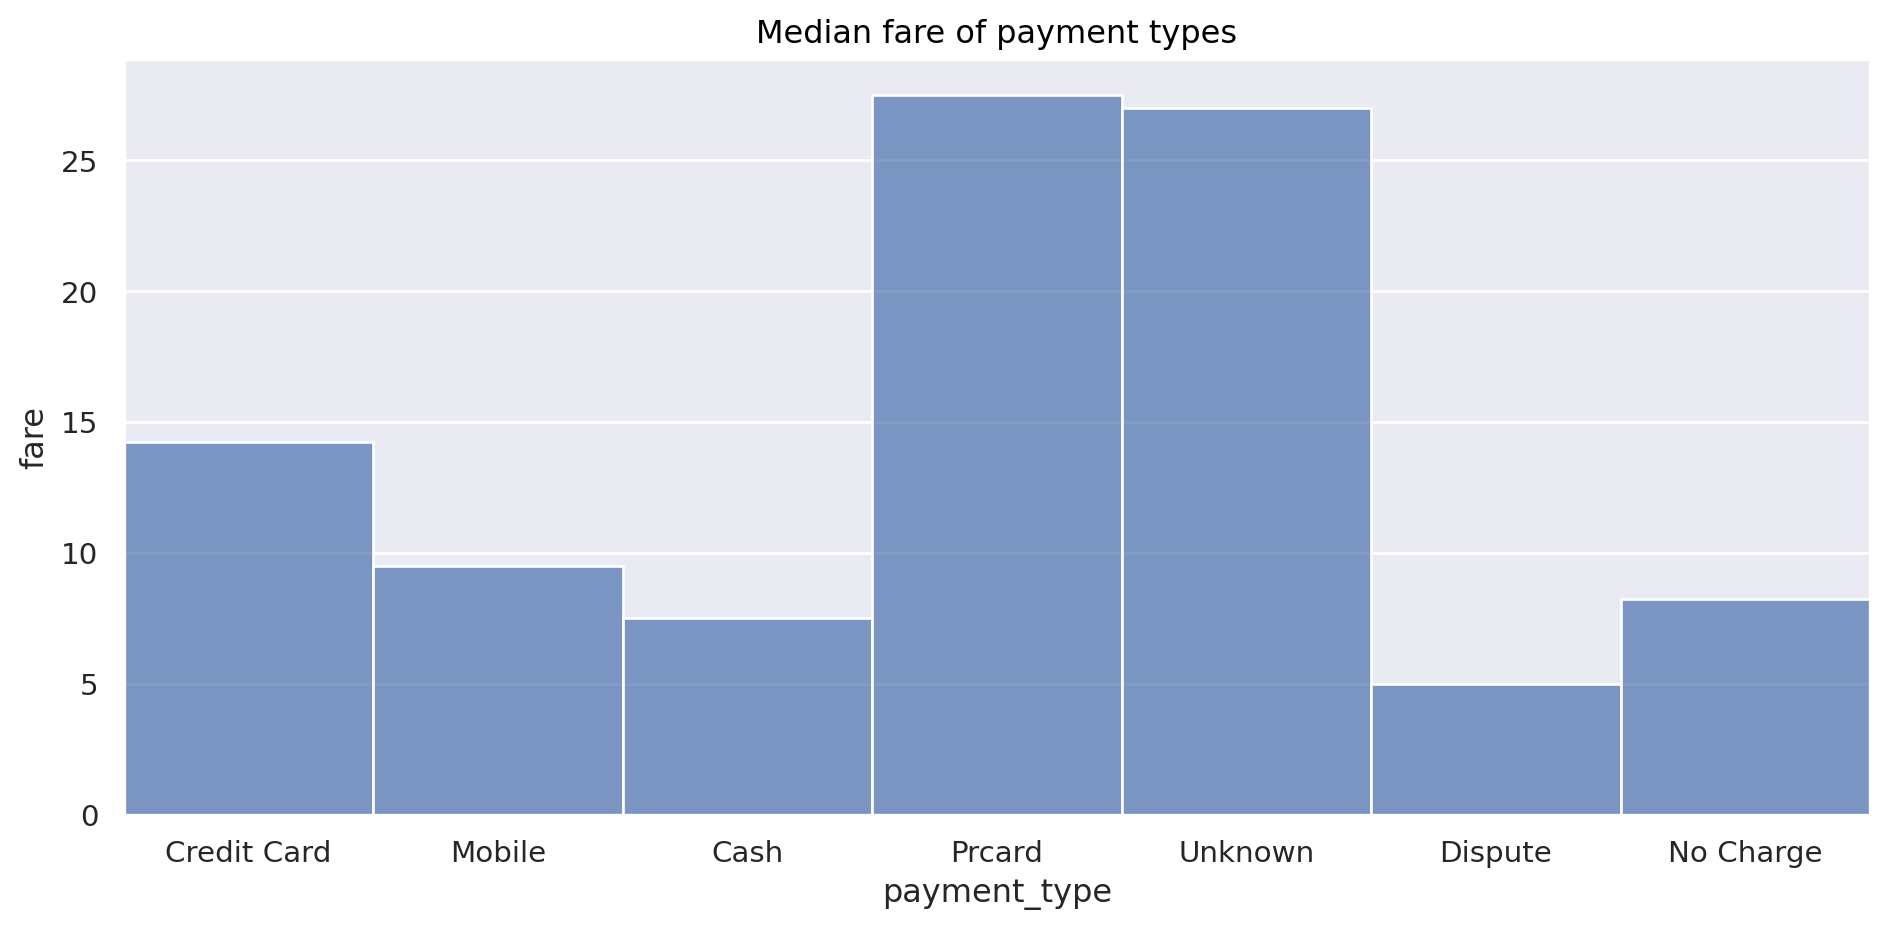

In [16]:
# 1 - Median fare of payment types
p = so.Plot(trips_full,
    "payment_type",
    "fare"
    ).layout(size=(10, 5)).label(title="Median fare of payment types")
p.add(so.Bars(), so.Agg("median"))


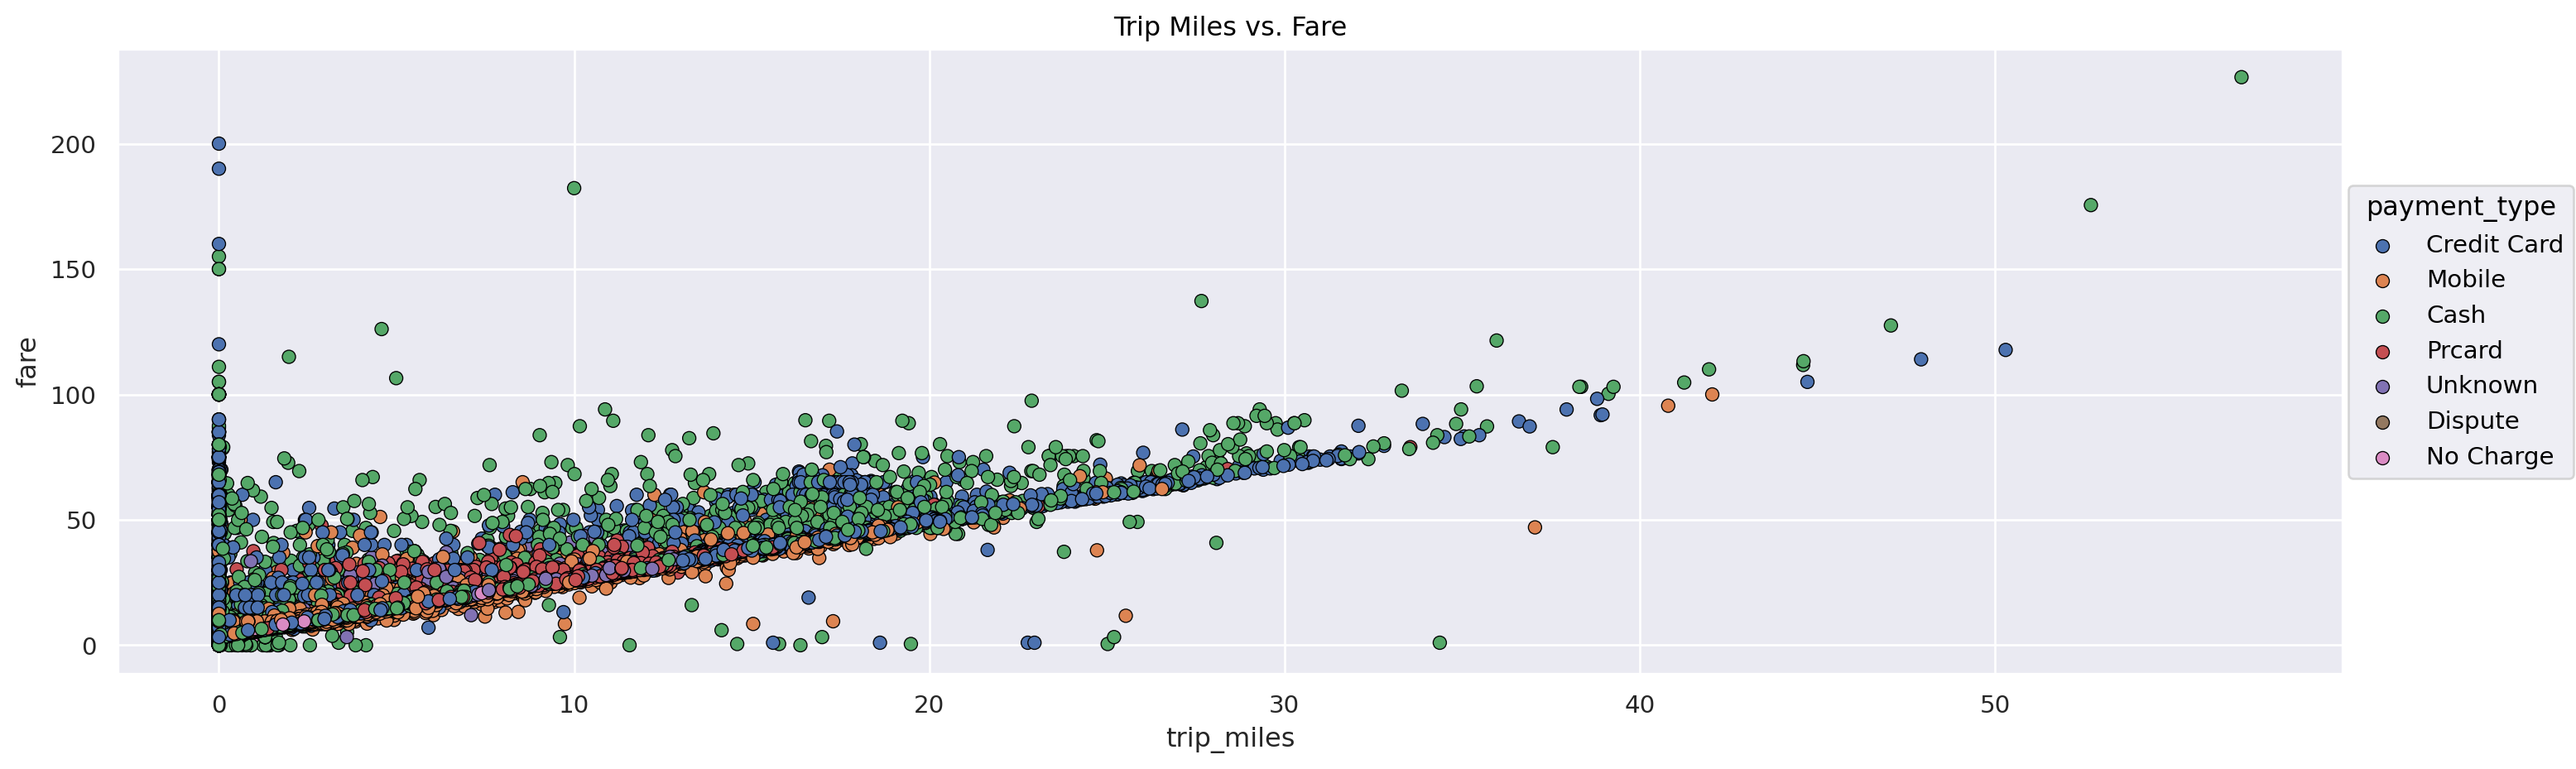

In [17]:
# 2 - Scatter Plot of Trip Miles vs. Fare, respectively colored by payment type
p = so.Plot(trips_full[(trips_full['fare'] < 250) & (trips_full['trip_miles'] < 60)], 
    "trip_miles", 
    "fare"
    ).layout(size=(15, 5)).label(title="Trip Miles vs. Fare")
p.add(
    so.Dot(stroke=1.1, edgecolor="black"), 
    color="payment_type")

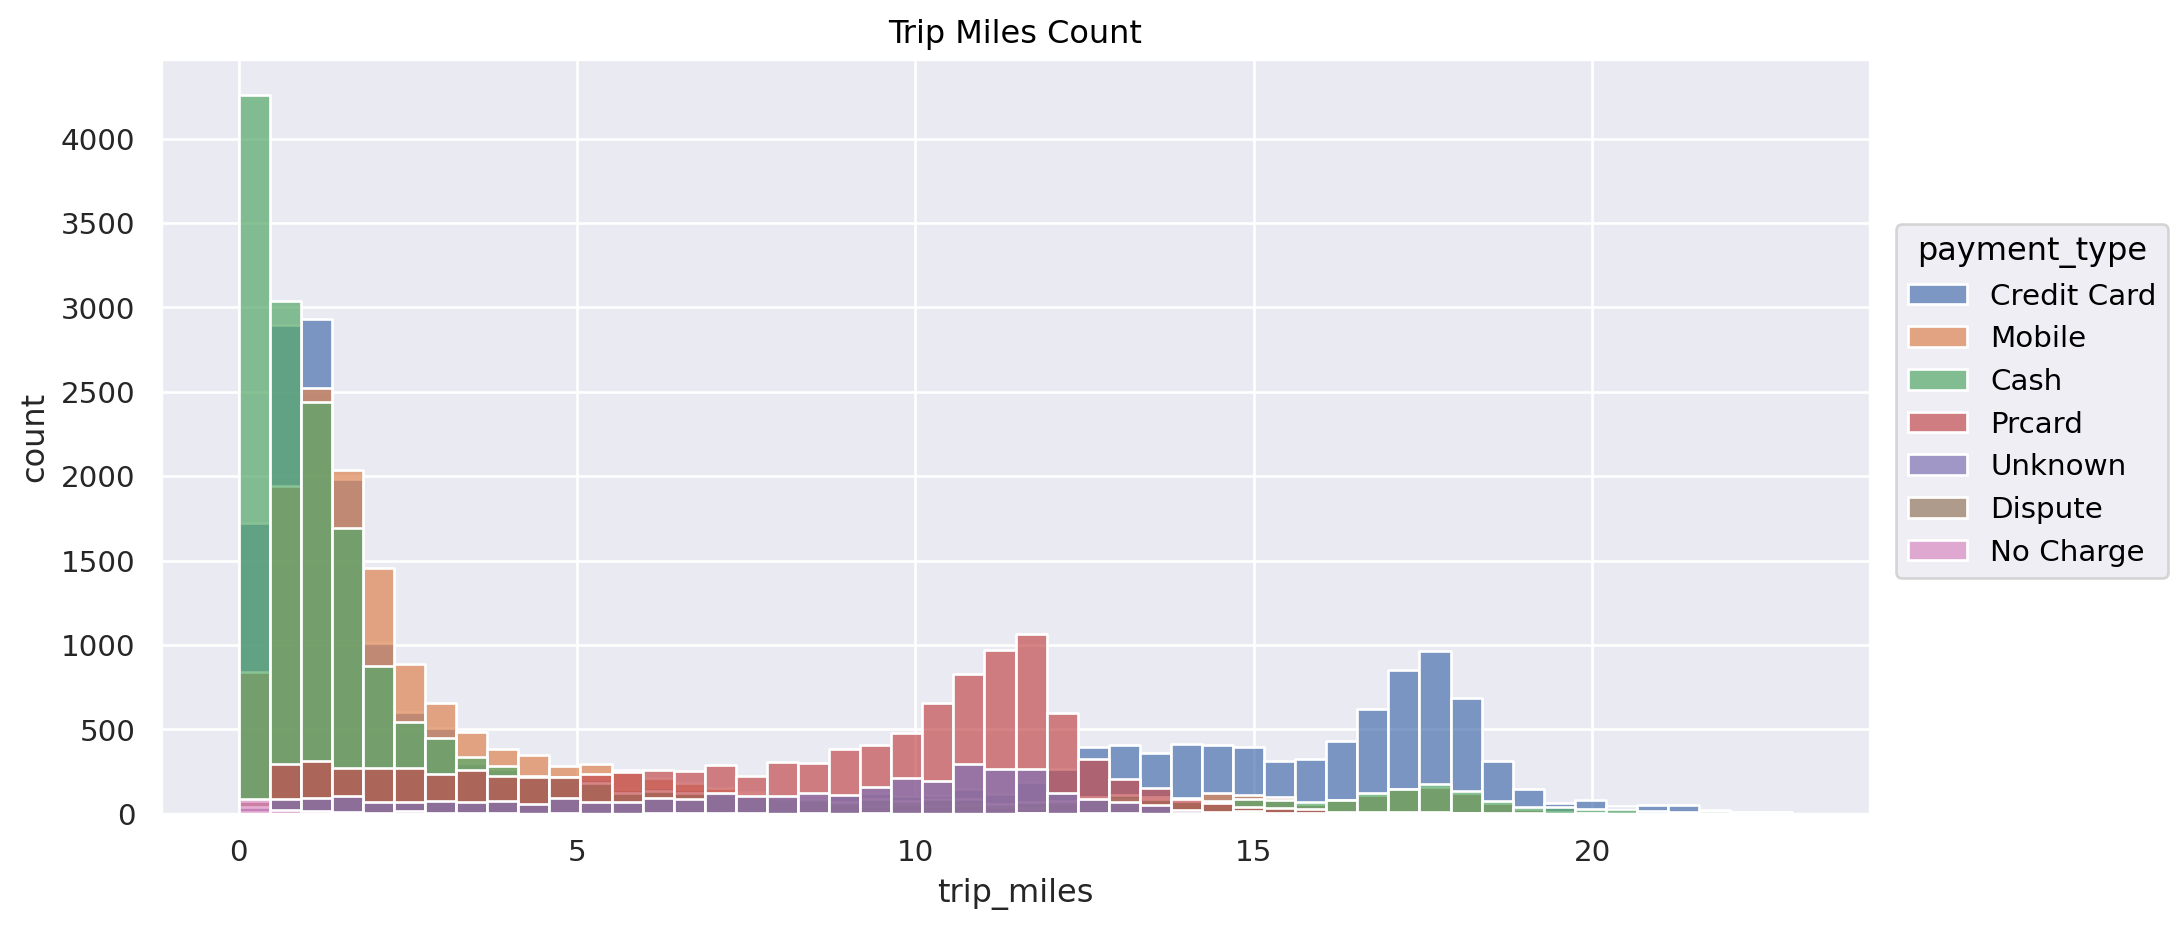

In [18]:
# 3 - Trip miles count, for each payment_type respectively
p = so.Plot(
    trips_full[trips_full['trip_miles'] < 23], 
    "trip_miles").layout(
        size=(10, 5)).label(
            x="trip_miles", 
            y="count", 
            title="Trip Miles Count")
p.add(
    so.Bars(), 
    so.Hist(), 
    color="payment_type"
    )

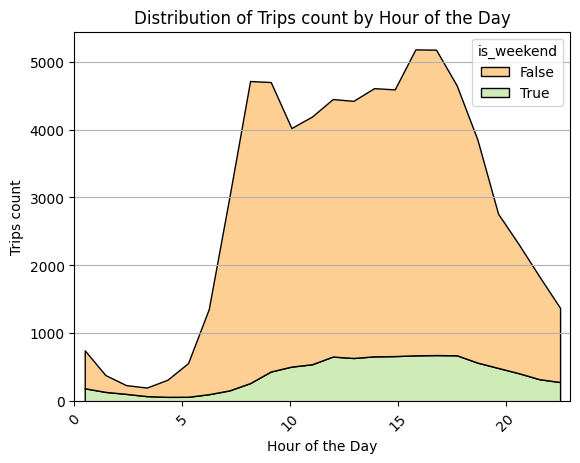

In [21]:
# 4 - Trip count by hour of the day
trips_full['hour_of_day'] = trips_full['trip_start_timestamp'].dt.hour
sns.histplot(
    data=trips_full[trips_full['trip_miles'] < 20], 
    x="hour_of_day", 
    hue="is_weekend", 
    multiple="stack", 
    stat="count",
    bins=24,
    element="poly",
    palette="Spectral",
    common_norm=True)
plt.title('Distribution of Trips count by Hour of the Day')
plt.ylabel('Trips count')
plt.xlabel('Hour of the Day')
plt.xlim(0, 23)  # Adjust the x-axis limits for better visibility
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

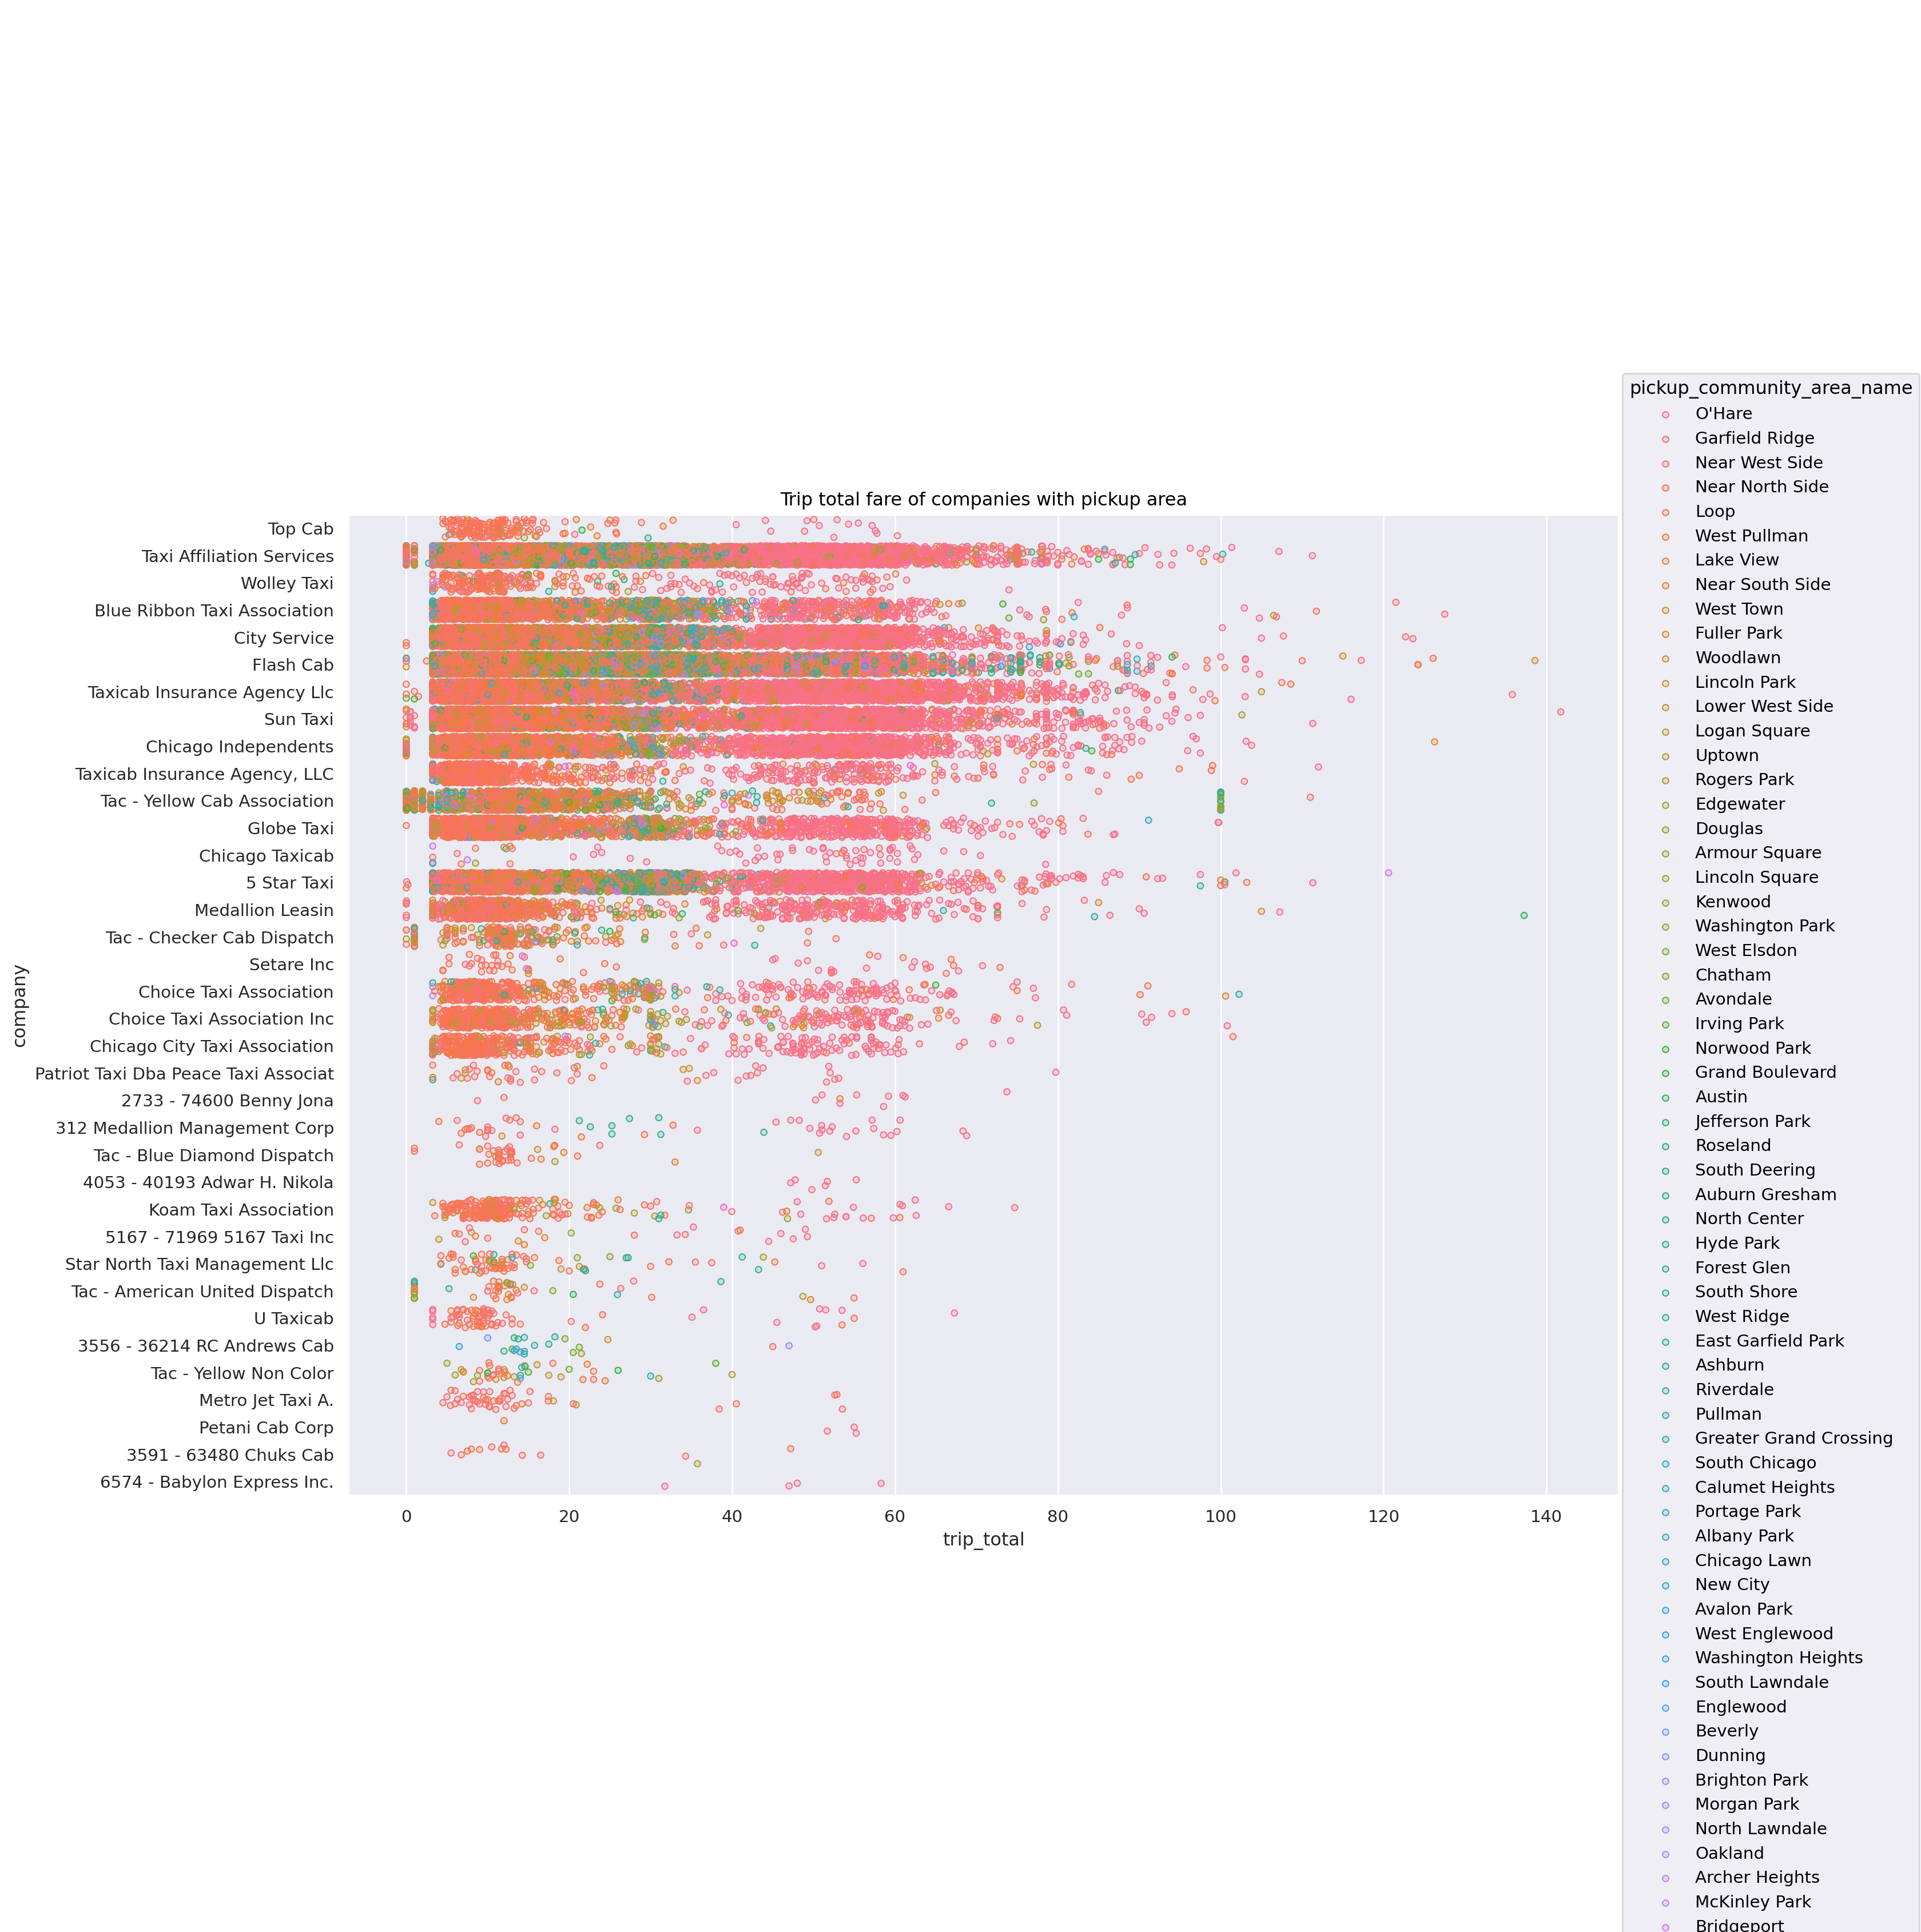

In [20]:
# 5 Trip total fare of companies with pickup area (colored)
p = so.Plot(trips_full[(trips_full['trip_total'] < 150)], "trip_total", "company").layout(
        size=(15, 10)).label(title="Trip total fare of companies with pickup area")
p.add(so.Dots(), so.Jitter(.9),color="pickup_community_area_name")